In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm
import cmasher as cmr
import matplotlib.font_manager as fm

font = 'TeX Gyre Pagella' if 'TeX Gyre Pagella' in [f.name for f in fm.fontManager.ttflist] else 'Times New Roman'

plt.rcParams.update({
        'font.family': font,
        'font.size': 14,  # Set all font sizes to 14
        'axes.labelsize': 14,  # Axis labels font size
        'xtick.labelsize': 14,  # X-axis ticks font size
        'ytick.labelsize': 14,  # Y-axis ticks font size
        'legend.fontsize': 14  # Legend font size
    })

In [18]:
file_path = '../mowry2/coarse/'
nx, ny = 1536, 1536
cutoff = 0
output_path = ''

# ux = np.loadtxt(file_path + 'ux_39800.txt').reshape((ny, nx))
# ux = ux[cutoff:, :]
# uy = np.loadtxt(file_path + 'uy_39800.txt').reshape((ny, nx))
# uy = uy[cutoff:, :]
# print(f"Maximum of ux = {np.max(ux, axis=None)}, minimum of ux = {np.min(ux, axis=None)}")
# print(f"Maximum of uy = {np.max(uy, axis=None)}, minimum of uy = {np.min(uy, axis=None)}")
# rho = np.loadtxt(file_path + 'rho.txt').reshape((ny, nx))
# rho = rho[:cutoff, :]
kn = np.loadtxt(file_path + 'Kn.dat').reshape((ny, nx)).transpose()
kn = kn[cutoff:, :]
nonzero_count = np.count_nonzero(kn)
print(f"Number of non-zero elements in kn = {nonzero_count}")
poresize = np.loadtxt(file_path + 'localporesize.dat').reshape((ny, nx)).transpose()
poresize = poresize[cutoff:, :]


Number of non-zero elements in kn = 210653


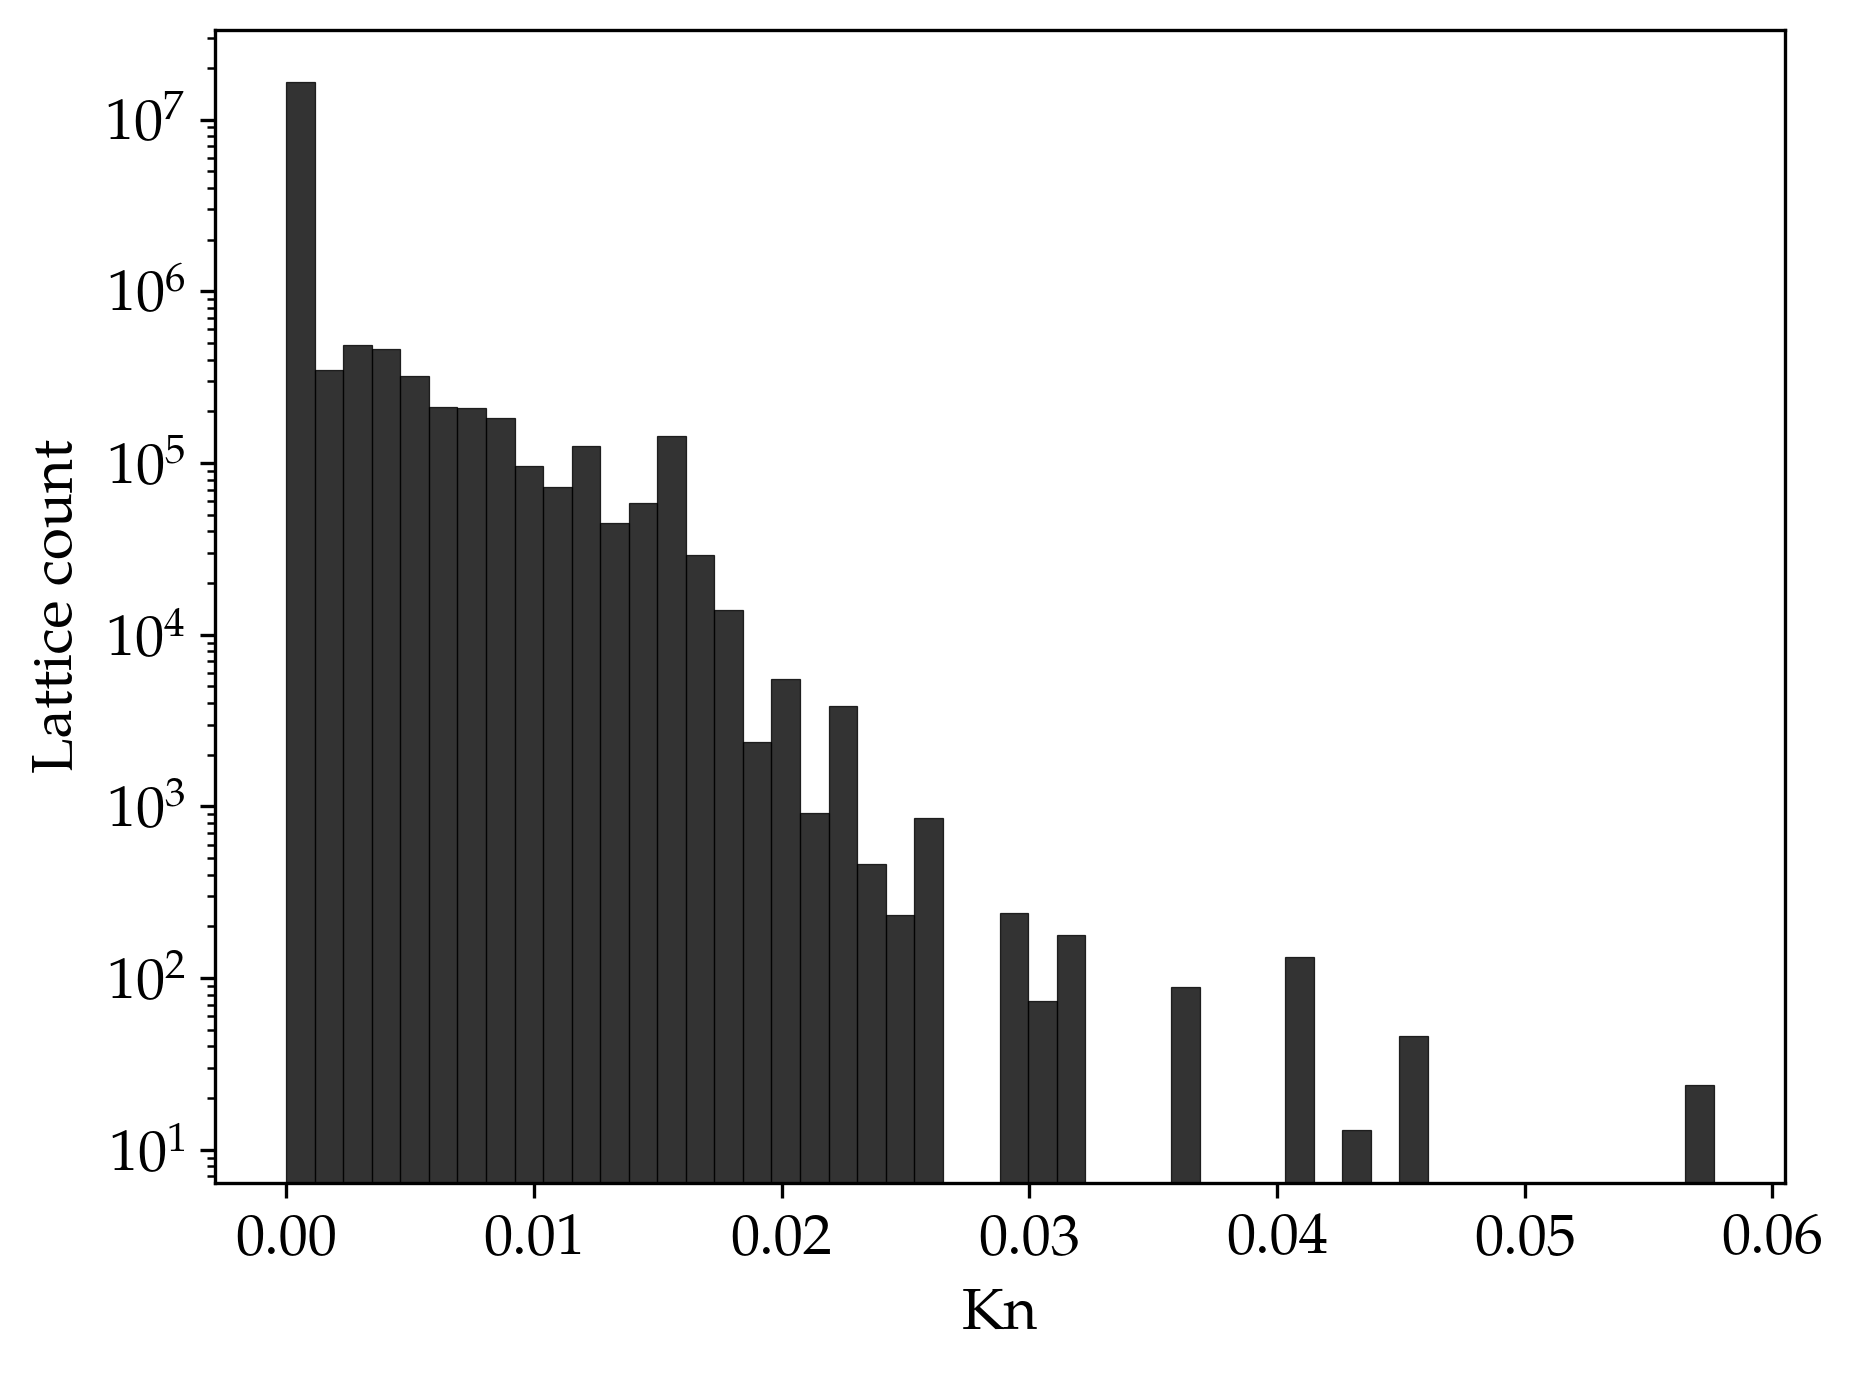

In [13]:
speed = np.sqrt(ux**2 + uy**2)

threshold = 1e-16
speed_filtered = np.ma.masked_less(speed, threshold)

# fig, ax = plt.subplots(dpi=300)
# im = ax.imshow(kn, cmap=cmr.amber)
# ax.axis('off')
# fig.colorbar(im, ax=ax, label="Knudsen number", fraction=0.03)
# fig.tight_layout()
# fig.savefig(output_path + 'kn.png', bbox_inches='tight')
# plt.show()

fig, ax = plt.subplots(dpi=300)
im = ax.hist(kn.flatten(), bins=50, color='black', alpha=0.8, edgecolor='black', linewidth=0.3)
# ax.axis('off')
# fig.colorbar(im, ax=ax, label="Knudsen number", fraction=0.03)
ax.set_yscale('log')
ax.set_xlabel('Kn')
ax.set_ylabel('Lattice count')
fig.tight_layout()
fig.savefig(output_path + 'kn.png', bbox_inches='tight')
plt.show()

